In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [23]:
df = pd.read_csv("data/earth_orbit_simulation.csv")
df.head()


,time,x,y,vx,vy
0,0,1.496000e+11,0.000000e+00,0.000000,29783.000000
1,21600,1.495972e+11,6.433128e+08,-128.124172,29783.000000
2,43200,1.495917e+11,1.286614e+09,-256.249530,29782.449023
3,64800,1.495834e+11,1.929891e+09,-384.373707,29781.347048
4,86400,1.495723e+11,2.573132e+09,-512.494335,29779.694065


In [24]:
# Feature: time
X = df[['time']]

# Targets: x and y positions
y = df[['x', 'y']]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2e}")


Mean Squared Error: 7.57e+21


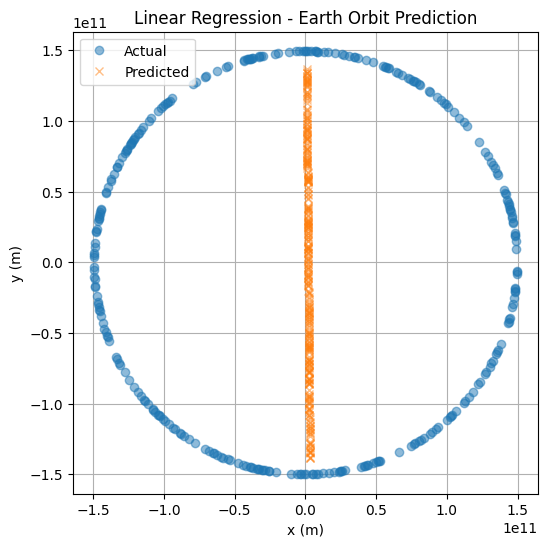

In [28]:
plt.figure(figsize=(6, 6))
plt.plot(y_test['x'], y_test['y'], 'o', alpha=0.5, label="Actual")
plt.plot(y_pred[:, 0], y_pred[:, 1], 'x', alpha=0.5, label="Predicted")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Linear Regression - Earth Orbit Prediction")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()


In [29]:
# Improving Linear Regression with Trigonometry Features
# Normalize time to a full 0 to 2π cycle
T = df['time'].max()
df['sin_time'] = np.sin(2 * np.pi * df['time'] / T)
df['cos_time'] = np.cos(2 * np.pi * df['time'] / T)


In [30]:
X = df[['sin_time', 'cos_time']]
y = df[['x', 'y']]


In [31]:
# 42 is the random seed for reproducibility (The answer to life, the universe, and everything)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

trigModel = LinearRegression()
trigModel.fit(X_train, y_train)
y_pred_trig = trigModel.predict(X_test)
mse_trig = mean_squared_error(y_test, y_pred_trig)

print(f"Improved MSE with sin/cos time: {mse_trig:.2e}")


Improved MSE with sin/cos time: 1.34e+16


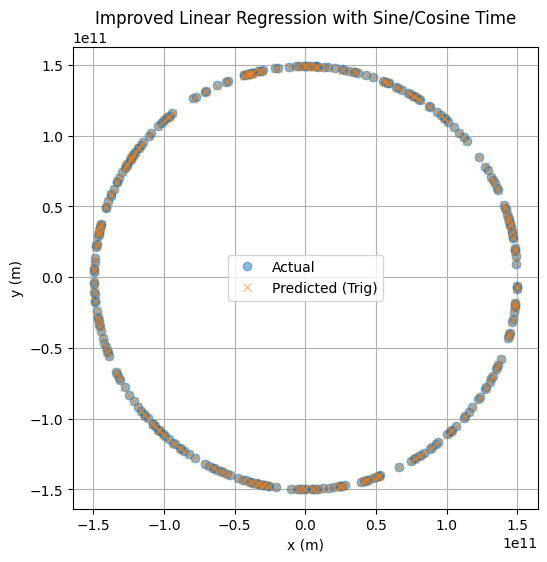

In [32]:
plt.figure(figsize=(6, 6))
plt.plot(y_test['x'], y_test['y'], 'o', alpha=0.5, label="Actual")
plt.plot(y_pred_trig[:, 0], y_pred_trig[:, 1], 'x', alpha=0.5, label="Predicted (Trig)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Improved Linear Regression with Sine/Cosine Time")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()
